<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 12</div>
<div style="text-align: right">Dino Konstantopoulos, with material by Thomas Wiecki, 4 December 2019</div>

# Bayesian Machine Learning

The problem with Deep learning is Understanding what a model does not know is that today’s deep learning algorithms are usually unable to understand their uncertainty. These models are often taken blindly and assumed to be accurate, which is not always the case. 

In May 2016 we tragically experienced the first [fatality](https://www.tesla.com/en_GB/blog/tragic-loss) from an assisted driving system. According to the manufacturer’s blog, *Neither Autopilot nor the driver noticed the white side of the tractor trailer against a brightly lit sky, so the brake was not applied*.

Classical deep learning struggles to model uncertainty. Probabilistic Programming often plays second fiddle to more algorithmic approaches like ensemble learning (e.g. random forests or gradient boosted regression trees), but it allows for very flexible creation of probabilistic models. 

The **Bayesian paradigm** is a statistical/probabilistic paradigm in which a **prior knowledge**, modelled by a probability distribution, is updated each time a new observation, whose uncertainty is modelled by another probability distribution, is recorded. The whole idea that rules the Bayesian paradigm is embedded in the **Bayes theorem** that expresses the relation between the updated knowledge (the **posterior**), the prior knowledge (the **prior**) and the knowledge coming from the observation (the **likelihood**).

The probabilistic approach is inherently **Bayesian** so we can specify **priors** to inform and constrain our models and get uncertainty estimation in form of a **posterior** distribution. Using MCMC sampling algorithms we can draw samples from this posterior to very flexibly estimate these models. **PyMC3** and [**Stan**](https://mc-stan.org/) are the current state-of-the-art tools to consruct and estimate these models. One major drawback of sampling, however, is that it's often very slow, especially for high-dimensional models. That's why more recently, **variational inference** algorithms have been developed that are almost as flexible as MCMC but faster. 

As we saw in class, the probabilistic approach is implemented using Markov Chain Monte Carlo (MCMC) algorithms aimed at generating samples from a given probability distribution. The **Monte Carlo** part of the method’s name is due to the sampling purpose whereas the **Markov Chain** part comes from the way we obtain these samples. In order to produce samples, the idea is to set up a Markov Chain whose stationary distribution is the one we want to sample from. Then, we can simulate a random sequence of states from that Markov Chain that is long enough to (almost) reach the steady state and then keep some generated states as our samples.

>**ADVI**: Instead of drawing samples from the posterior, variational inference algorithms fit a distribution (e.g. normal) to the posterior turning a sampling problem into and optimization problem. A bit like Guassian Mixture Models (GMMs). ADVI -- Automatic Differentation Variational Inference -- is implemented in PyMC3 and Stan, as well as a new package called [Edward](https://github.com/blei-lab/edward/) which is mainly concerned with Variational Inference.

In short, Bayesian deep learning (BDL) provides a framework which can also model uncertainty. BDL can achieve state-of-the-art results, while ***also understanding uncertainty***.

How is Bayesian ML different from classical ML? This is what I attempt to illustrate for you in this notebook. Neural weights become ***probabilistic***, stemming from a Model pdf, with a **mean** and a **variance**. In other words, we build machines that ***are not really sure***. And that is great because ***humans are not really sure, either***!


<br />
<center>
<img src =images/unsure.jpg width = 600 />
</center>


## Variational inference

[Variational Inference](https://en.wikipedia.org/wiki/Variational_Bayesian_methods) is a machine learning method, used to approximate probability densities through optimization. In context to Bayesian models, it approximates the posterior distributions by selecting a parameterized family of probability distributions and the using [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) (KL divergence) to find the member closest to the target.

Variational Inference is ***better suited for large datasets*** (i.e. for NLP tasks) and to quickly explore many models.

In topic modelling, the [Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) (LDA) method defines such a model for the description of texts in a corpus. Thus, given the full corpus vocabulary of size V and a given number of topics T, the model assumes:
- There exists, for each topic, a **topic-word** probability distribution over the vocabulary (with a Dirichlet prior assumed)
- There exists, for each document, a **document-topic** probability distribution over the topics (with another Dirichlet prior assumed)
- Each word in a document has been sampled such that, first, we have sampled a topic from the **document-topic** distribution of the document and, second, we have sampled a word from the **topic-word** distribution attached to the sampled topic

The purpose of the LDA method, whose name comes from the Dirichlet priors assumed in the model, is then to infer the latent topics in the observed corpus as well as the topic decomposition of each documents. We can say very roughly, denoting w the vector of words in the corpus and z the vector of topics associated to these words, that we want to infer z based on the observed w in a Bayesian way.

Variational Inference (VI) methods consist in finding the best approximation of a distribution among a parametrised family, e.g. as we did with Gaussian Mixture Models (GMM). In order to find this best approximation, we follow an optimisation process (over family parameters) that only require the targeted distribution to be defined up to a factor. More specifically, the idea is to define a parametrised family of distributions and to optimise over the parameters to obtain the closest element to the target with respect to a well defined error measure. What error measure, you may ask?

The [Kullback-Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) (also called relative entropy) is a measure of how one probability distribution is different from a second, reference probability distribution. It is a distribution-wise **asymmetric** measure and thus does not qualify as a statistical metric of spread (it also does not satisfy the triangle inequality). In the simple case, a Kullback–Leibler divergence of 0 indicates that the two distributions in question are identical. In simplified terms, it is a measure of **surprise**.

Once both the parametrised family and the KL error measure have been defined, we can initialise the parameters (randomly or according to a well defined strategy) and proceed to the optimisation. Several classical optimisation techniques can be used such as gradient descent or coordinate descent that will lead, in practice, to a local optimum.

MCMC and VI methods have different properties that imply different typical use cases. In one hand, the sampling process of MCMC approaches is pretty heavy but has no bias and so these methods are preferred when **accurate results** are expected, without regards to the time it takes. In the other hand, although the choice of the family in VI methods can clearly introduce a bias, it comes along with a reasonable optimisation process that makes these methods particularly adapted to very **large scale** inference problem requiring **fast** computations, such as with NLP applications.

## Kinds of uncertainties

**Epistemic uncertainty** captures our ignorance about which model generated our collected data. This uncertainty can be explained away with Big data, and is often referred to as **model uncertainty**. Epistemic uncertainty is really important to model for small datasets where the training data is sparse.

**Aleatoric uncertainty** captures our uncertainty with respect to information which our data cannot explain. For example, aleatoric uncertainty in images can be attributed to occlusions (because cameras can’t see through objects) or lack of visual features or over-exposed regions of an image, etc. It can be explained away with the ability to observe *all* explanatory variables with increasing precision.

<br />
<center>
<img src =images/uncertainty_types.jpg width = 600 />
</center>

This is nicely explained [here](https://arxiv.org/pdf/1703.04977.pdf).

Bayesian deep learning models typically form uncertainty estimates by either placing distributions over model weights, or by learning a direct mapping to probabilistic outputs.

We can model aleatoric uncertainty by modifying the error metric. Instead of a Euclidean loss: $(y−y`)^2$, we replace the loss function with a mean and a variance over the data.

Epistemic uncertainty is harder to model. It requires us to model distributions over models and their parameters which is  hard to achieve at scale. A popular technique to model this is Monte Carlo dropout sampling which places a Bernoulli distribution over the network’s weights. In practice, this means we can train a model with dropout. Then, at test time, rather than performing model averaging, we stochastically sample from the network with different random dropout masks. The statistics of this distribution of outputs will reflect the model’s epistemic uncertainty.

[Here](https://arxiv.org/pdf/1705.07115.pdf) are examples of such models.



## Autoencoders and variational autoencoders

A **neural autoencoder** and a **neural *variational* autoencoder** sound alike, but they’re different.

An autoencoder accepts input, compresses it, and then recreates the original input. The two main uses of an autoencoder are to compress data to two (or three) dimensions so it can be graphed, and to compress and decompress images or documents, which removes noise in the data. We also used an autoencoder in our examples of single, 60, and two-layer ANNs.

A variational autoencoder assumes that the source data has some sort of underlying probability distribution (such as Gaussian) and then attempts to find the parameters of the distribution. It is a probabilistic, indeed Bayesian mode. Implementing a variational autoencoder is much more challenging than implementing an autoencoder. 

The one main use of a variational autoencoder is to generate new data that is related to the original source data. A variational autoencoder is a generative system, like our analytic data models we obtained with PyMC3. It serves a similar purpose as a generative adversarial network (although GANs work differently).

Bayesian Neural networks are also probabilistic.

## A Bayesian Neural Network (BNN)

Let's generate interesting data using `scikit-learn`'s `make_moons` [API](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html), which constructs two interleaving half circles, difficult to linearly distinguish without using a kernel method.

In [5]:
%matplotlib inline
import theano
import pymc3 as pm
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('white')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [6]:
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
#X = X.astype(floatX)
#Y = Y.astype(floatX)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

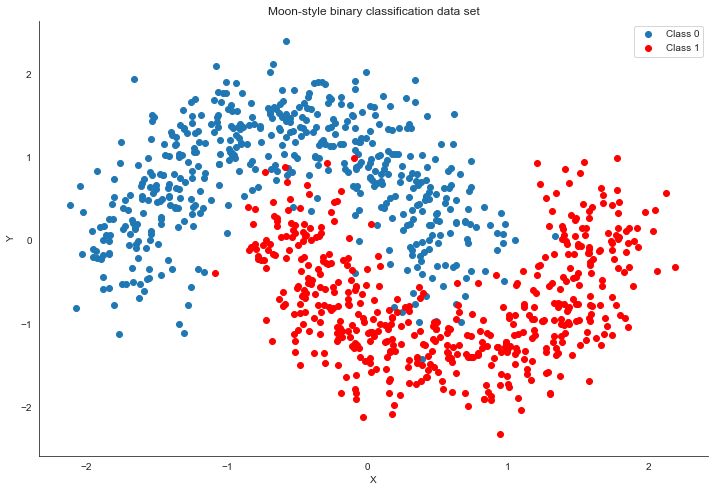

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Moon-style binary classification data set');

The lower moon is *discriminated* from the upper moon.

Let's use a two-layer ANN with 5 neurons in each layer. Since we're building a Bayesian neural network, we'll use `PyMC3`, and our weights are now going to be gaussian probability distributions instead of scalars (helps regularize weights). Our activation function are all sigmoidal, and our posterior will be binary, thus a Bernoulli pdf. As you can see, the bias is missing, to simplify the equations. We can tack them on later.

The basic unit of our neural network is a [perceptron](https://en.wikipedia.org/wiki/Perceptron) which is nothing more than a **linear regression** if you only consider upstream neuron inputs and the bias, and a **logistic regression** if you take into consideration the neuron's **activation function**.

In [11]:
def construct_ann(ann_input, ann_output):
    n_hidden = 5
    
    # Initialize random weights between each layer
    init_1 = np.random.randn(X.shape[1], n_hidden).astype(float)
    init_2 = np.random.randn(n_hidden, n_hidden).astype(float)
    init_out = np.random.randn(n_hidden).astype(float)
        
    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1, 
                                 shape=(X.shape[1], n_hidden), 
                                 testval=init_1)
        
        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_2)
        
        # Weights from hidden layer to output
        weights_2_out = pm.Normal('w_2_out', 0, sd=1, 
                                  shape=(n_hidden,), 
                                  testval=init_out)
        
        # Build neural-network using tanh activation function
        # Normally hidden layer will use tanh
        act_1 = pm.math.tanh(pm.math.dot(ann_input, 
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, 
                                         weights_1_2))
        # Normally output will use sigmoid
        act_out = pm.math.sigmoid(pm.math.dot(act_2, 
                                              weights_2_out))
        
        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('out', 
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network

# Trick: Turn inputs and outputs into shared variables. 
# It's still the same thing, but we can later change the values of the shared variable 
# (to switch in the test-data later) and pymc3 will just use the new data. 
# Kind-of like a pointer we can redirect.
# For more info, see: http://deeplearning.net/software/theano/library/compile/shared.html
ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)
neural_network = construct_ann(ann_input, ann_output)

We could now just run a MCMC sampler like **NUTS** which works pretty well in this case, but this will become very slow as we scale our model up to deeper architectures with more layers.

Instead of NUTS, we use [ADVI](https://arxiv.org/pdf/1603.00788.pdf) variational inference algorithm, faster and scales better than NUTS, which is very relevant to deep ANNs.

In [9]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

In [10]:
%%time

with neural_network:
    inference = pm.ADVI()
    approx = pm.fit(n=50000, method=inference)

Average Loss = 165.37: 100%|██████████| 50000/50000 [00:21<00:00, 2360.51it/s]
Finished [100%]: Average Loss = 165.34


CPU times: user 2min 3s, sys: 6.02 s, total: 2min 9s
Wall time: 56.2 s


We draw samples from the variational approximation using the sample method.

In [12]:
trace = approx.sample(draws=5000)

We plot the objective function (ELBO) and witness the optimization slowly improving the fit over time:

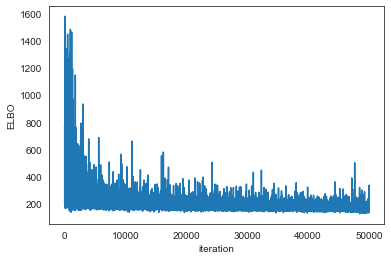

In [13]:
plt.plot(inference.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration');

older vs. new ELBO:

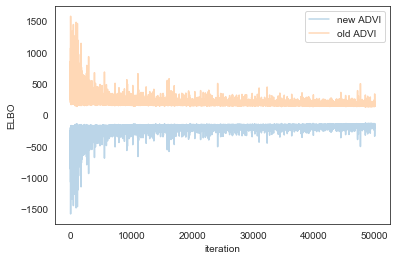

In [14]:
plt.plot(-inference.hist, label='new ADVI', alpha=.3)
plt.plot(approx.hist, label='old ADVI', alpha=.3)
plt.legend()
plt.ylabel('ELBO')
plt.xlabel('iteration');

In [15]:
# We can get predicted probability from model
neural_network.out.distribution.p

sigmoid.0

Our model is trained! Let's predict on the hold-out set using a posterior predictive check (PPC).

1. We can use [`sample_posterior_predictive()`] to generate new data (in this case class predictions) from the posterior (sampled from the variational estimation).
2. We can get the node directly and build the theano graph using our approximation (`approx.sample_node`), with a lot of speed up

Compare:

In [16]:
# create symbolic input
x = T.matrix('X')
# symbolic number of samples is supported, we build vectorized posterior on the fly
n = T.iscalar('n')
# Do not forget test_values or set theano.config.compute_test_value = 'off'
x.tag.test_value = np.empty_like(X_train[:10])
n.tag.test_value = 100
_sample_proba = approx.sample_node(neural_network.out.distribution.p, 
                                   size=n,
                                   more_replacements={neural_network['ann_input']: x})
# It is time to compile the function
# No updates are needed for Approximation random generator 
# Efficient vectorized form of sampling is used
sample_proba = theano.function([x, n], _sample_proba)

# Create bechmark functions
def production_step1():
    pm.set_data(new_data={'ann_input': X_test, 'ann_output': Y_test}, model=neural_network)
    ppc = pm.sample_posterior_predictive(trace, samples=500, progressbar=False, model=neural_network)

    # Use probability of > 0.5 to assume prediction of class 1
    pred = ppc['out'].mean(axis=0) > 0.5
    
def production_step2():
    sample_proba(X_test, 500).mean(0) > 0.5

NameError: name 'T' is not defined

See the difference

In [ ]:
%timeit production_step1()

In [ ]:
%timeit production_step2()

Let's go ahead and generate predictions:

In [17]:
# Replace arrays our NN references with the test data
ann_input.set_value(X_test)
ann_output.set_value(Y_test)

with neural_network:
    ppc = pm.sample_ppc(trace, samples=500, progressbar=False)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['out'].mean(axis=0) > 0.5

Let's plot:

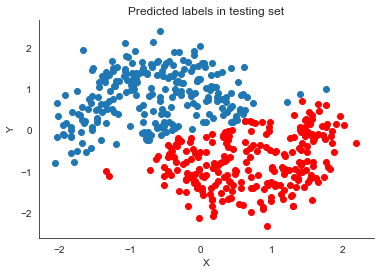

In [18]:
fig, ax = plt.subplots()
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
sns.despine()
ax.set(title='Predicted labels in testing set', xlabel='X', ylabel='Y');

Alternatively:

In [19]:
pred = sample_proba(X_test, 500).mean(0) > 0.5

NameError: name 'sample_proba' is not defined

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
sns.despine()
ax.set(title='Predicted labels in testing set', xlabel='X', ylabel='Y');

The classes are correctly predicted.

In [ ]:
print('Accuracy = {}%'.format((Y_test == pred).mean() * 100))

Let's evaluate class probability predictions on a grid over the whole input space, to see what the classifier has learned:

In [20]:
grid = pm.floatX(np.mgrid[-3:3:100j,-3:3:100j])
grid_2d = grid.reshape(2, -1).T
dummy_out = np.ones(grid.shape[1], dtype=np.int8)

In [21]:
ann_input.set_value(grid_2d)
ann_output.set_value(dummy_out)

with neural_network:
    ppc = pm.sample_ppc(trace, samples=500, progressbar=False)

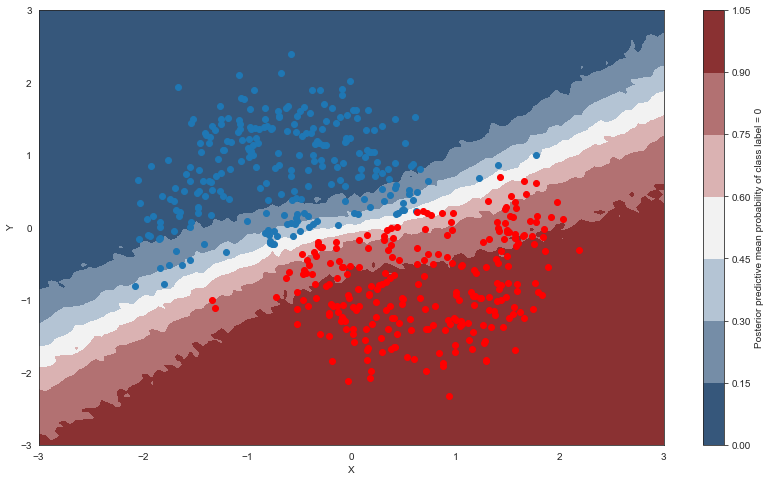

In [22]:
cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(grid[0], grid[1], ppc['out'].mean(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Posterior predictive mean probability of class label = 0');

The figure above reveals how our neural network's Bernoulli discriminator subdivides the plan into two regions, corresponding to trained data. 

This subdivision is similar to what could have been achieved with a non-probabilistic ANN. However, we can look at the standard deviation of the posterior predictive to get a sense for the uncertainty in our predictions! Here is what that looks like:

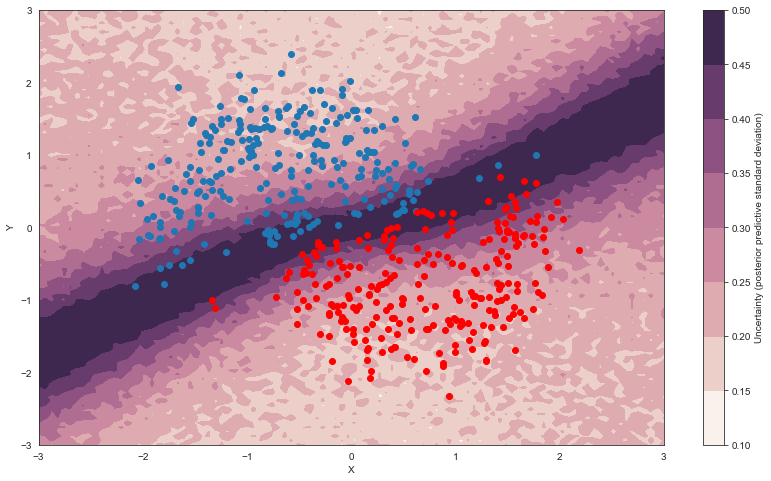

In [23]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(grid[0], grid[1], ppc['out'].std(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Uncertainty (posterior predictive standard deviation)');

And here we see that, very close to the decision boundary, our uncertainty as to which label to predict is highest!

## Mini-batch ADVI

So far, we have trained our model on all data at once. Obviously this won't scale to something like ImageNet. Moreover, training on mini-batches of data (stochastic gradient descent) avoids local minima and can lead to faster convergence.

Fortunately, ADVI can be run on **mini-batches** as well. It just requires some setting up:

In [ ]:
minibatch_x = pm.Minibatch(X_train, batch_size=50)
minibatch_y = pm.Minibatch(Y_train, batch_size=50)
neural_network_minibatch = construct_nn(minibatch_x, minibatch_y)
with neural_network_minibatch:
    approx = pm.fit(40000, method=pm.ADVI())

In [ ]:
plt.plot(inference.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration');

As you can see, mini-batch ADVI's running time is much lower. It also seems to converge faster. You can also run this example on the GPU by setting `device = gpu` and `floatX = float32` in your `.theanorc`.

For fun, we can also look at the trace. The point is that we also get uncertainty of our Neural Network weights.

In [ ]:
pm.traceplot(trace);

# Conclusion
There *are* tricks to get uncertainty estimates from classical ANNs, but BNNs give you an entire probabilistic *framework* for learning, and it more closely matches the human experience. Just google `Bayesian Neural Nets` to see how popular they are right now. `Edward` is a great python library for building BNNs.

Associating predictions with uncertainty is critical for many applications like driverless cars. For example, to further maximize accuracy, we might want to train the model primarily on samples from that high-uncertainty region!